Prajakta Patil : E22CSEU0912

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
from tensorflow import keras
from tensorflow.keras import layers
from ultralytics import YOLO
from torchvision import transforms, models
from sklearn.metrics import classification_report
from PIL import Image

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Saving 02667.jpg to 02667.jpg


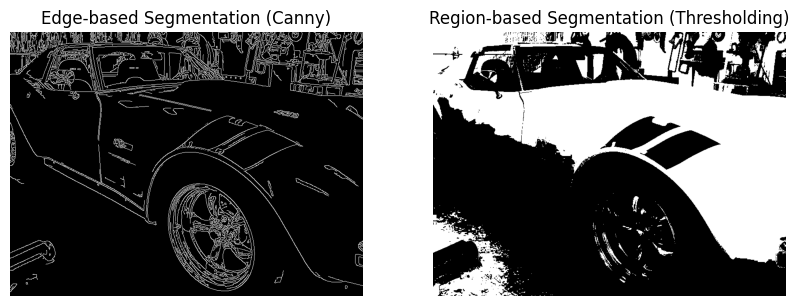

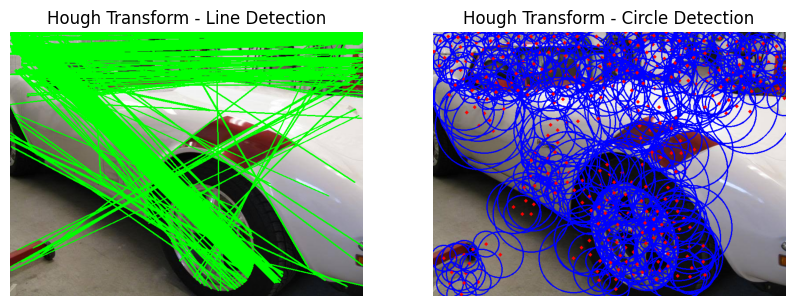

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Upload an image in Google Colab
from google.colab import files
uploaded = files.upload()

# Load the image
filename = list(uploaded.keys())[0]
image = cv2.imread(filename)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Edge-based segmentation using Canny edge detector
edges = cv2.Canny(gray, 50, 150)

# Display the edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title("Edge-based Segmentation (Canny)")
plt.axis("off")

# Region-based segmentation using thresholding
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

plt.subplot(1, 2, 2)
plt.imshow(thresh, cmap='gray')
plt.title("Region-based Segmentation (Thresholding)")
plt.axis("off")
plt.show()

# Hough Transform for line detection
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)

# Draw detected lines on the image
line_img = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hough Transform for circle detection
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=100)

# Draw detected circles
circle_img = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (255, 0, 0), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (0, 0, 255), 3)  # Center of the circle

# Display the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
plt.title("Hough Transform - Line Detection")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB))
plt.title("Hough Transform - Circle Detection")
plt.axis("off")
plt.show()


Saving 08080.jpg to 08080.jpg


100%|██████████| 6.25M/6.25M [00:00<00:00, 19.8MB/s]



0: 480x640 9 cars, 1 truck, 1 traffic light, 397.3ms
Speed: 9.6ms preprocess, 397.3ms inference, 34.7ms postprocess per image at shape (1, 3, 480, 640)


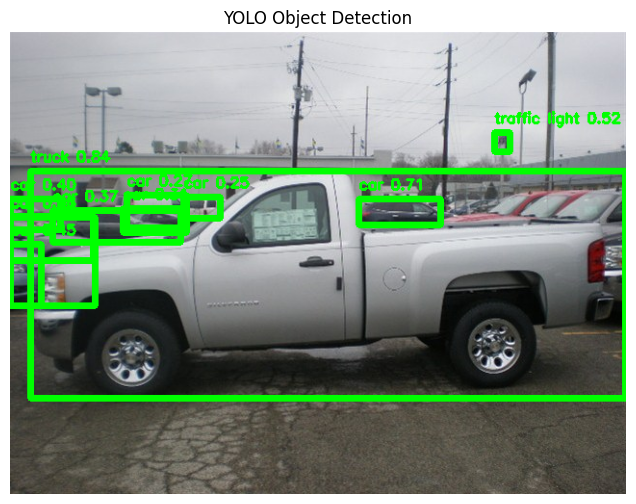

In [ ]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

model = YOLO('yolov8n.pt')

image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = model(image)

# bounding boxes on the detected objects
for result in results:
    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])  # Get bounding box coordinates
        class_id = int(box.cls[0])  # Get class ID
        confidence = float(box.conf[0])  # Confidence score
        label = f"{model.names[class_id]} {confidence:.2f}"
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 6)
        cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("YOLO Object Detection")
plt.axis("off")
plt.show()

In [ ]:
!pip install torch torchvision

In [ ]:
!pip install opencv-python torch torchvision

In [ ]:
import torchvision
from torchvision.transforms import functional as F

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 115MB/s]


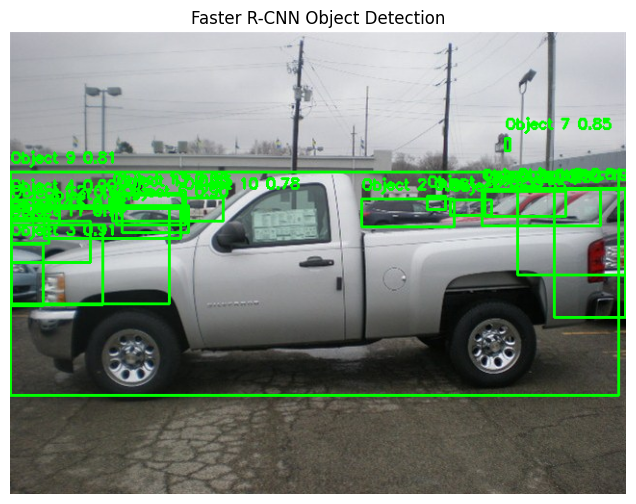

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

image = cv2.imread(filename)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_tensor = F.to_tensor(image_rgb).unsqueeze(0)

with torch.no_grad():
    predictions = model(image_tensor)

# Process detections
threshold = 0.5
for idx in range(len(predictions[0]['boxes'])):
    score = predictions[0]['scores'][idx].item()
    if score > threshold:
        x1, y1, x2, y2 = map(int, predictions[0]['boxes'][idx])
        label = f"Object {idx+1} {score:.2f}"
        cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(image_rgb, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

plt.figure(figsize=(8, 6))
plt.imshow(image_rgb)
plt.title("Faster R-CNN Object Detection")
plt.axis("off")
plt.show()